In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Data
df = pd.read_csv(r"C:\Users\PAROMITA DAS\Downloads\customer segment\Ecommerce.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


# Data Cleaning and Preparation

In [121]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday


In [122]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,DayOfWeek
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,Friday
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,Friday
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,Friday
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,Friday
401603,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,Friday


In [123]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391183 entries, 0 to 401603
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    391183 non-null  object        
 1   StockCode    391183 non-null  object        
 2   Description  391183 non-null  object        
 3   Quantity     391183 non-null  int64         
 4   InvoiceDate  391183 non-null  datetime64[ns]
 5   UnitPrice    391183 non-null  float64       
 6   CustomerID   391183 non-null  float64       
 7   Country      391183 non-null  object        
 8   TotalSales   391183 non-null  float64       
 9   DayOfWeek    391183 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 32.8+ MB


In [124]:
df.shape

(391183, 10)

In [125]:
# Summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,391183.0,13.179665,181.907403,1.0,2.00,6.00,12.00,80995.0
UnitPrice,391183.0,2.874130,4.284639,0.0,1.25,1.95,3.75,649.5
CustomerID,391183.0,15295.083503,1710.359579,12346.0,13969.00,15158.00,16794.00,18287.0
TotalSales,391183.0,22.335397,310.919394,0.0,4.95,11.90,19.80,168469.6


In [126]:
# Summary statistics for categorical variables
df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,391183,18405,576339,541
StockCode,391183,3659,85123A,2023
Description,391183,3871,WHITE HANGING HEART T-LIGHT HOLDER,2016
Country,391183,37,United Kingdom,348892
DayOfWeek,391183,6,Thursday,78919


In [127]:
# Calculate the count of null-values for each column
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalSales     0
DayOfWeek      0
dtype: int64

In [128]:
num = round((df["CustomerID"].isnull().sum()*100)/len(df),2)
print("The percentage of missing values in the CustomerID column is:", num,'%')

The percentage of missing values in the CustomerID column is: 0.0 %


In [129]:
# Removing null-values from the 'CustomerID' column
df = df.dropna(subset = ["CustomerID"])

In [130]:
# Verifying the removal of missing values 
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalSales     0
DayOfWeek      0
dtype: int64

In [ ]:
df.shape

(391183, 10)

In [132]:
# Check for duplicate rows
duplicates = df.duplicated()

# Count the number of duplicate rows
print(duplicates.sum())

0


In [133]:
df[duplicates]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,DayOfWeek


In [134]:
# Remove duplicates, keeping the first occurence
df = df.drop_duplicates()

In [135]:
# Reset the index after dropping duplicates
# Here drop = True removes the previous indices
df.reset_index(drop=True, inplace=True)

In [136]:
# Checking the shape after droping the duplicates
df.shape

(391183, 10)

In [137]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday


In [138]:
# Count of rows for which quantity is less than 0
df[df["Quantity"] < 0].shape[0]

0

In [139]:
# Exploring the rows for which quantity is less than 0
df[df["Quantity"] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,DayOfWeek


In [140]:
# Store negative quantity rows in df1
# These will be required if we want to analyse the cancelled orders later-on
df_cancelled = df[df["Quantity"] < 0]

In [141]:
df_cancelled.shape

(0, 10)

In [142]:
# Keep only rows with Quantity ≥ 0
df = df[df["Quantity"] >= 0]

In [143]:
# Checking the shape of the orginal dataframe
df.shape

(391183, 10)

In [144]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,391183.0,13.179665,181.907403,1.0,2.00,6.00,12.00,80995.0
UnitPrice,391183.0,2.874130,4.284639,0.0,1.25,1.95,3.75,649.5
CustomerID,391183.0,15295.083503,1710.359579,12346.0,13969.00,15158.00,16794.00,18287.0
TotalSales,391183.0,22.335397,310.919394,0.0,4.95,11.90,19.80,168469.6


In [145]:
df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,391183,18405,576339,541
StockCode,391183,3659,85123A,2023
Description,391183,3871,WHITE HANGING HEART T-LIGHT HOLDER,2016
Country,391183,37,United Kingdom,348892
DayOfWeek,391183,6,Thursday,78919


### Exploring Quantity

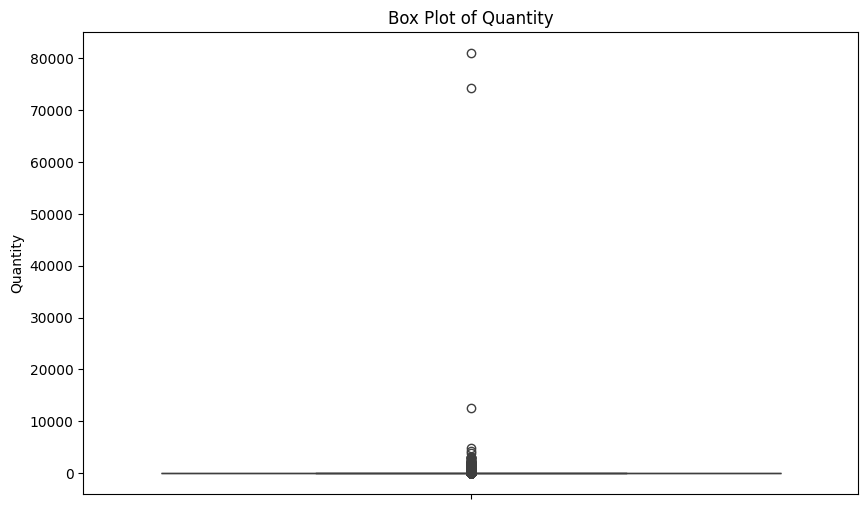

In [146]:
# Boxplot of quantity
plt.figure(figsize=(10, 6))
sns.boxplot(y=df["Quantity"])
plt.title("Box Plot of Quantity")
plt.ylabel("Quantity")
plt.show()

In [147]:
# Checking the details of the order containing maximum quantity
df[df["Quantity"] == 80995]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,DayOfWeek
390722,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.6,Friday


In [148]:
# Checking if this customer has orderd anything else
df[df["CustomerID"] == 16446.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,DayOfWeek
131622,553573,22980,PANTRY SCRUBBING BRUSH,1,2011-05-18 09:52:00,1.65,16446.0,United Kingdom,1.65,Wednesday
131623,553573,22982,PANTRY PASTRY BRUSH,1,2011-05-18 09:52:00,1.25,16446.0,United Kingdom,1.25,Wednesday
390722,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.60,Friday


In [149]:
# Excluding some outliers
df2 = df[df["Quantity"] < 50]
df2.shape

(378697, 10)

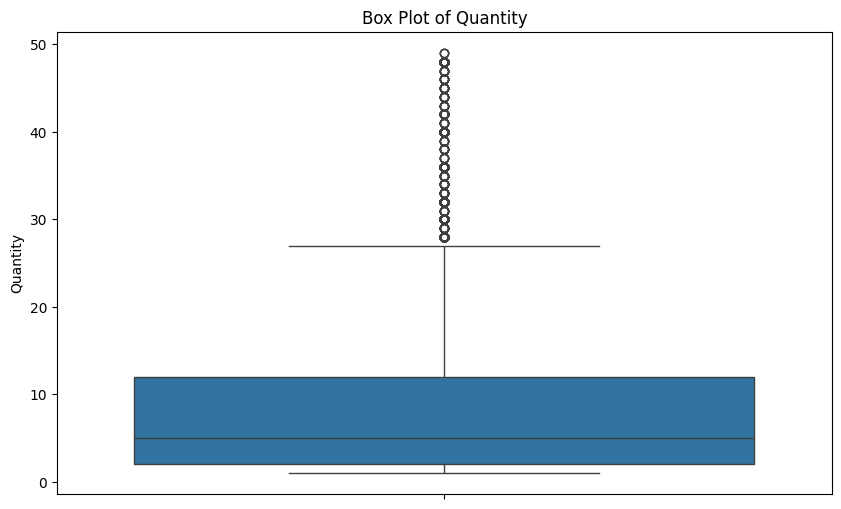

In [150]:
# Boxplot after excluding outliers
plt.figure(figsize=(10, 6))
sns.boxplot(y=df2["Quantity"])
plt.title("Box Plot of Quantity")
plt.ylabel("Quantity")
plt.show()

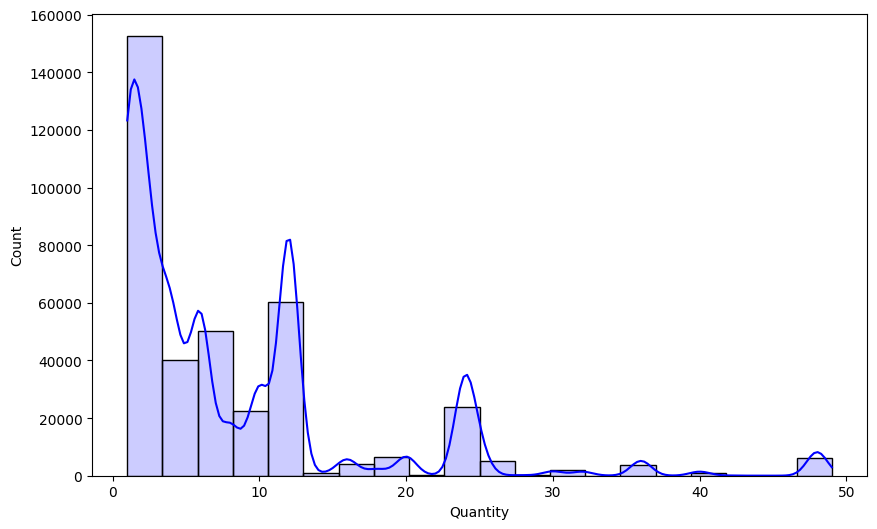

In [189]:
# Hisplot for checking the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df2["Quantity"], bins=20, kde=True, color="blue", alpha=0.2)
plt.show()

### Exploring Unit Price

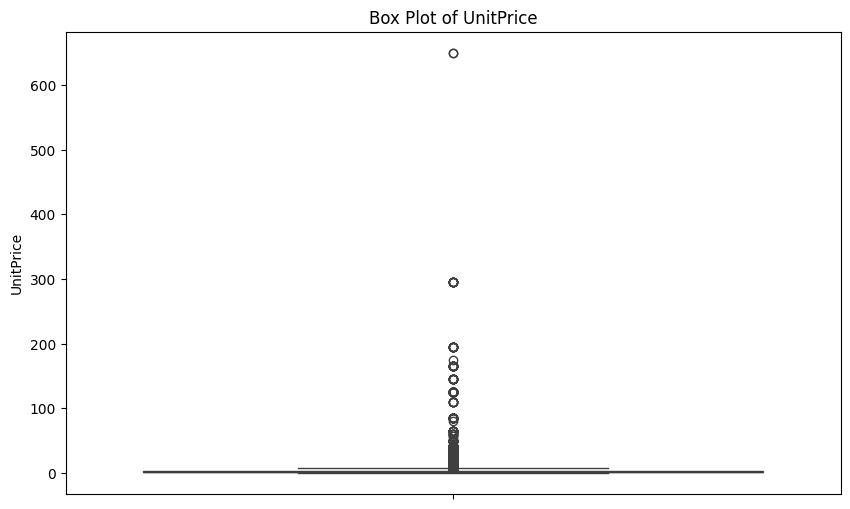

In [152]:
# Boxplot of Unit Price
plt.figure(figsize=(10,6))
sns.boxplot(y=df["UnitPrice"])
plt.title("Box Plot of UnitPrice")
plt.ylabel("UnitPrice")
plt.show()

In [190]:
# Checking the max value of UnitPrice
df[df["UnitPrice"] == 8142.75]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,DayOfWeek


In [154]:
df3 = df[df["UnitPrice"] < 10]
df3.shape

(381693, 10)

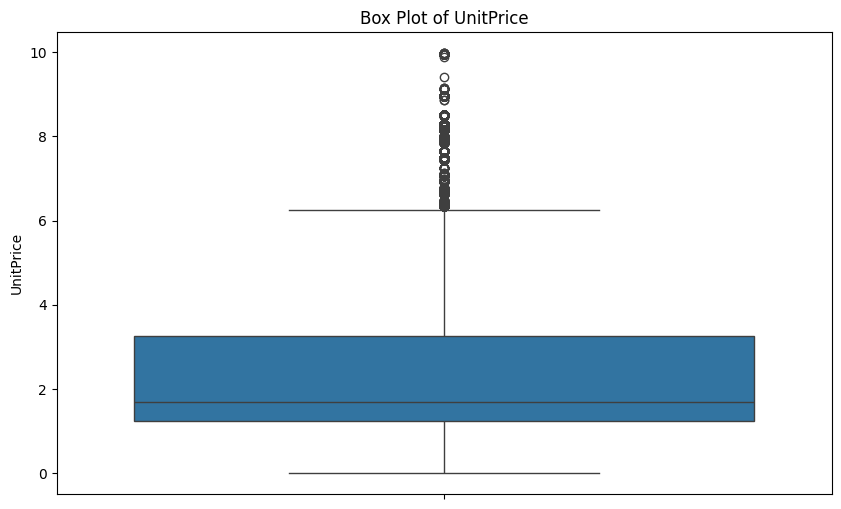

In [155]:
plt.figure(figsize=(10,6))
sns.boxplot(y=df3["UnitPrice"])
plt.title("Box Plot of UnitPrice")
plt.ylabel("UnitPrice")
plt.show()

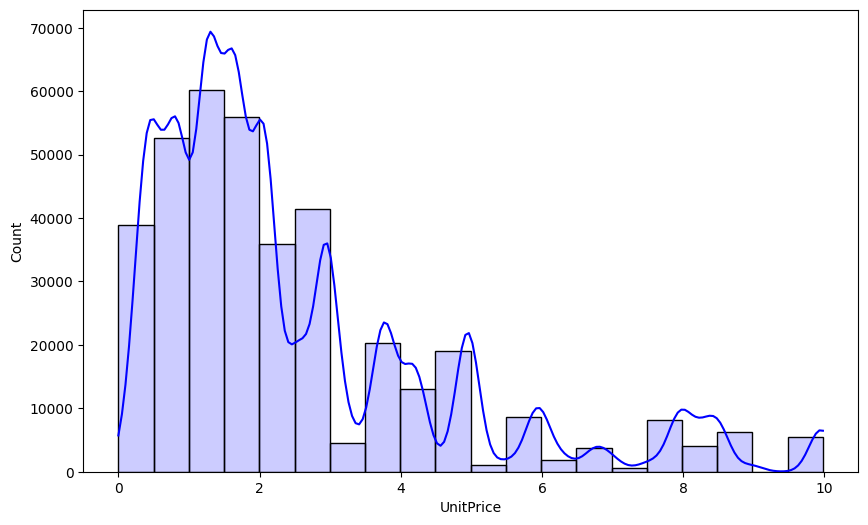

In [156]:
plt.figure(figsize=(10,6))
sns.histplot(df3["UnitPrice"], bins=20, color="blue", kde=True, alpha=0.2)
plt.show()

In [157]:
#Insights: Most of the orders are low priced products. 

### Exploring InvoiceDate

In [158]:
# Checking the dtype
print(df["InvoiceDate"].dtype)

datetime64[ns]


In [159]:
# Changing the InvoiceDate datatype to datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
print(df["InvoiceDate"].dtype)

datetime64[ns]


In [160]:
# First and Last order date
print("First Order Date:", df["InvoiceDate"].min())
print("Last Order Date:", df["InvoiceDate"].max())

First Order Date: 2010-12-01 08:26:00
Last Order Date: 2011-12-09 12:50:00


### Exploring StockCode

In [161]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,Wednesday
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,Wednesday
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,Wednesday
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,Wednesday
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,Wednesday


In [162]:
# Checking the numeric StockCodes
df["StockCode"] = df["StockCode"].astype(str)
df[df["StockCode"].str.isnumeric()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,DayOfWeek
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,Wednesday
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,Wednesday
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,Wednesday
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,Wednesday
...,...,...,...,...,...,...,...,...,...,...
391178,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,Friday
391179,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,Friday
391180,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,Friday
391181,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,Friday


In [163]:
df.shape

(391183, 10)

In [164]:
# Filter for StockCodes that are entirely numeric
numeric_stockcodes = df[df['StockCode'].str.isnumeric()]

# Calculate the length of each numeric StockCode
numeric_stockcodes['Length'] = numeric_stockcodes['StockCode'].str.len()

# Group by the length and count the occurrences
length_counts = numeric_stockcodes['Length'].value_counts().sort_index()

# View the result
print(length_counts)

5    358309
Name: Length, dtype: int64


In [165]:
# Checking the alphanumeric StockCodes
df[~df["StockCode"].str.isnumeric()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday
48,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,15.30,Wednesday
...,...,...,...,...,...,...,...,...,...,...
391052,581578,84997C,CHILDRENS CUTLERY POLKADOT BLUE,8,2011-12-09 12:16:00,4.15,12713.0,Germany,33.20,Friday
391083,581579,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2011-12-09 12:19:00,1.79,17581.0,United Kingdom,17.90,Friday
391112,581580,84993A,75 GREEN PETIT FOUR CASES,2,2011-12-09 12:20:00,0.42,12748.0,United Kingdom,0.84,Friday
391118,581580,85049A,TRADITIONAL CHRISTMAS RIBBONS,1,2011-12-09 12:20:00,1.25,12748.0,United Kingdom,1.25,Friday


In [167]:
# Filter for StockCodes that are entirely numeric
alphanumeric_stockcodes = df[~df['StockCode'].str.isnumeric()]

# Calculate the length of each numeric StockCode
alphanumeric_stockcodes['Length'] = alphanumeric_stockcodes['StockCode'].str.len()

# Group by the length and count the occurrences
length__counts = alphanumeric_stockcodes['Length'].value_counts().sort_index()

# View the result
print(length__counts)

6    32583
7      291
Name: Length, dtype: int64


In [168]:
alphanumeric_stockcodes.shape

(32874, 11)

In [169]:
# Creating a new column which contains the length of the StockCodes
df["len_sc"] = df["StockCode"].str.len()
df["len_sc"].value_counts()

5    358309
6     32583
7       291
Name: len_sc, dtype: int64

In [170]:
# StockCodes which have a length less than 5
df[(df["len_sc"] < 5)]["StockCode"].value_counts()

Series([], Name: StockCode, dtype: int64)

In [171]:
df_sc = df[(df["len_sc"] < 5)][["StockCode", "Description"]].drop_duplicates()
df_sc

,StockCode,Description


In [172]:
df[df["StockCode"] == 'PADS']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,DayOfWeek,len_sc


In [173]:
df[(df["len_sc"] > 7)]["StockCode"].value_counts()

Series([], Name: StockCode, dtype: int64)

In [174]:
df[(df["len_sc"] == 7)]["StockCode"].value_counts()

15056BL    291
Name: StockCode, dtype: int64

In [175]:
df[df["StockCode"] == '15056BL'].head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,DayOfWeek,len_sc
131,536381,15056BL,EDWARDIAN PARASOL BLACK,2,2010-12-01 09:41:00,5.95,15311.0,United Kingdom,11.9,Wednesday,7


In [176]:
# Removing all the anomaly stockcodes i.e. stock codes of length 1,2,4,12 
# Keeping only the stockcodes having length 5,6,7
df = df[(df["len_sc"] >= 5) & (df["len_sc"] < 8)]
df["len_sc"].value_counts()

5    358309
6     32583
7       291
Name: len_sc, dtype: int64

In [177]:
df.shape

(391183, 11)

In [178]:
# Removing the len_sc column
df = df.drop("len_sc", axis=1)
df.shape

(391183, 10)

### Exploring Description

In [179]:
df[["StockCode", "Description"]].describe()

,StockCode,Description
count,391183,391183
unique,3659,3871
top,85123A,WHITE HANGING HEART T-LIGHT HOLDER
freq,2023,2016


In [180]:
# Identify stock codes with more than one unique description
duplicates = df.groupby('StockCode')['Description'].nunique()
duplicates = duplicates[duplicates > 1].index

# Filter the rows that have these stock codes
duplicate_rows = df[df['StockCode'].isin(duplicates)]

# Sort the result by StockCode
duplicate_rows_sorted = duplicate_rows[['StockCode', 'Description']].sort_values(by='StockCode')

# View the result
print(duplicate_rows_sorted.drop_duplicates())


       StockCode                          Description
68568     16156L                       WRAP, CAROUSEL
190440    16156L                        WRAP CAROUSEL
130736    17107D  FLOWER FAIRY,5 SUMMER B'DRAW LINERS
350774    17107D         FLOWER FAIRY 5 DRAWER LINERS
244552    17107D    FLOWER FAIRY 5 SUMMER DRAW LINERS
...          ...                                  ...
323381    90014A         SILVER M.O.P. ORBIT NECKLACE
130848    90014B         GOLD M PEARL  ORBIT NECKLACE
275456    90014B           GOLD M.O.P. ORBIT NECKLACE
212296    90014C          SILVER/BLACK ORBIT NECKLACE
366253    90014C      SILVER AND BLACK ORBIT NECKLACE

[445 rows x 2 columns]


### Exploring CustomerID

In [181]:
df["CustomerID"].nunique()

4335

In [182]:
df["CustomerID"].value_counts().head()

17841.0    7667
14911.0    5586
14096.0    5095
12748.0    4397
14606.0    2674
Name: CustomerID, dtype: int64

### Exploring Country

In [183]:
df["Country"].nunique()

37

In [184]:
df["Country"].value_counts().head(37)

United Kingdom          348892
Germany                   8644
France                    8019
EIRE                      7128
Spain                     2418
Netherlands               2326
Belgium                   1935
Switzerland               1811
Portugal                  1416
Australia                 1183
Norway                    1049
Channel Islands            743
Italy                      741
Finland                    647
Cyprus                     601
Sweden                     427
Austria                    384
Denmark                    367
Poland                     325
Japan                      321
Israel                     245
Unspecified                241
Singapore                  215
Iceland                    182
USA                        179
Canada                     150
Greece                     142
Malta                      109
United Arab Emirates        67
European Community          57
RSA                         57
Lebanon                     45
Lithuani

### Exploring InvoiceNo

In [185]:
df["InvoiceNo"].nunique()

18405

In [186]:
df["InvoiceNo"].value_counts().head(5)

576339    541
579196    532
580727    528
578270    441
573576    434
Name: InvoiceNo, dtype: int64

In [187]:
df.shape

(391183, 10)

# EDA

## Time Series Analysis

In [69]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [70]:
df.shape

(391183, 8)

In [71]:
# Creating a new column "Total Sales"
df["TotalSales"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [72]:
df["TotalSales"].describe()

count    391183.000000
mean         22.335397
std         310.919394
min           0.000000
25%           4.950000
50%          11.900000
75%          19.800000
max      168469.600000
Name: TotalSales, dtype: float64

In [ ]:
# useing this dataframe for the rest of time-series analysis
dft = df.copy()
dft.shape

(391183, 9)

### Daily Sales Over Time

In [ ]:
# Analysing Daily sales 
# Extract date from the datetime
dft["InvoiceDate"] = dft["InvoiceDate"].dt.date
dft.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34


In [75]:
daily_sales = dft.groupby("InvoiceDate")["TotalSales"].sum().reset_index()
daily_sales.head()

,InvoiceDate,TotalSales
0,2010-12-01,46035.29
1,2010-12-02,47164.57
2,2010-12-03,23530.93
3,2010-12-05,30905.32
4,2010-12-06,30807.90


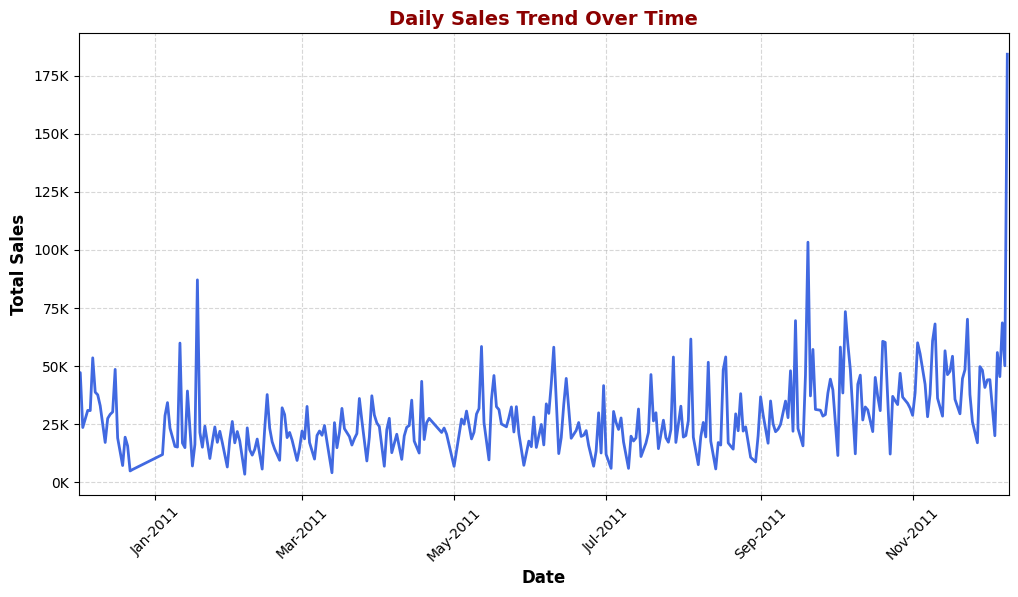

In [ ]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=daily_sales, x="InvoiceDate", y="TotalSales", color="royalblue", linewidth=2)

plt.xlabel("Date", fontsize=12, fontweight="bold")
plt.ylabel("Total Sales", fontsize=12, fontweight="bold")
plt.title("Daily Sales Trend Over Time", fontsize=14, fontweight="bold", color="darkred")


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))  # Jan-2010 format
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Show every 2nd month

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))  # Converts 80,000 → 80K


plt.xlim(df["InvoiceDate"].min(), df["InvoiceDate"].max())

plt.xticks(rotation=45)


plt.grid(True, linestyle="--", alpha=0.5)

# Show plot
plt.show()


In [77]:
# Resample sales data monthly and sum up the total sales
monthly_sales = df.resample('M', on="InvoiceDate")["TotalSales"].sum()

# Convert index to formatted string (e.g., "Jan 2010")
monthly_sales.index = monthly_sales.index.strftime('%b %Y')

# Display the result
print(monthly_sales)

InvoiceDate
Dec 2010     565199.56
Jan 2011     562682.91
Feb 2011     442293.59
Mar 2011     583143.85
Apr 2011     454440.88
May 2011     659242.49
Jun 2011     653264.92
Jul 2011     591603.79
Aug 2011     635514.38
Sep 2011     938752.63
Oct 2011    1002326.56
Nov 2011    1136534.00
Dec 2011     512228.08
Name: TotalSales, dtype: float64


In [78]:
print("The Average monthly sales over a period of one year is", round(monthly_sales.values.mean()))

The Average monthly sales over a period of one year is 672094


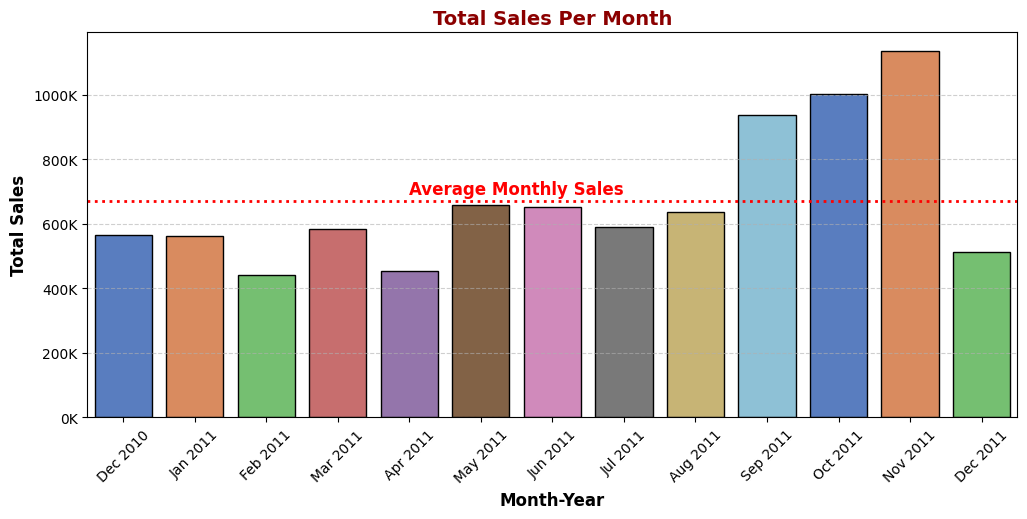

In [196]:
plt.figure(figsize=(12, 5))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="muted", edgecolor="black")


plt.xlabel("Month-Year", fontsize=12, fontweight="bold")
plt.ylabel("Total Sales", fontsize=12, fontweight="bold")
plt.title("Total Sales Per Month", fontsize=14, fontweight="bold", color="darkred")


plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))


average_sales = monthly_sales.values.mean()

plt.axhline(average_sales, color="red", linestyle="dotted", linewidth=2, label=f"Avg Sales: {average_sales/1000:.1f}K")


plt.text(x=len(monthly_sales) - 6,  # Position near the last bar
         y=average_sales + (average_sales * 0.03),  # Slightly above the line
         s="Average Monthly Sales",
         color="red",
         fontsize=12,
         fontweight="bold",
         ha="right")  # Align to the right

plt.xticks(rotation=45)

plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

### Sales by Day

In [80]:
# Analysing Daily sales 
# Extract the date from the datetime
df["DayOfWeek"] = df["InvoiceDate"].dt.day_name()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday


In [81]:
sales_by_day = df.groupby("DayOfWeek")["TotalSales"].sum().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
sales_by_day

DayOfWeek
Monday       1326500.48
Tuesday      1672493.12
Wednesday    1559469.25
Thursday     1939228.91
Friday       1459797.08
Saturday            NaN
Sunday        779738.80
Name: TotalSales, dtype: float64

In [82]:
df[df["DayOfWeek"] == "Saturday"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,DayOfWeek


In [ ]:
#Insight: There are no sales on Saturday!

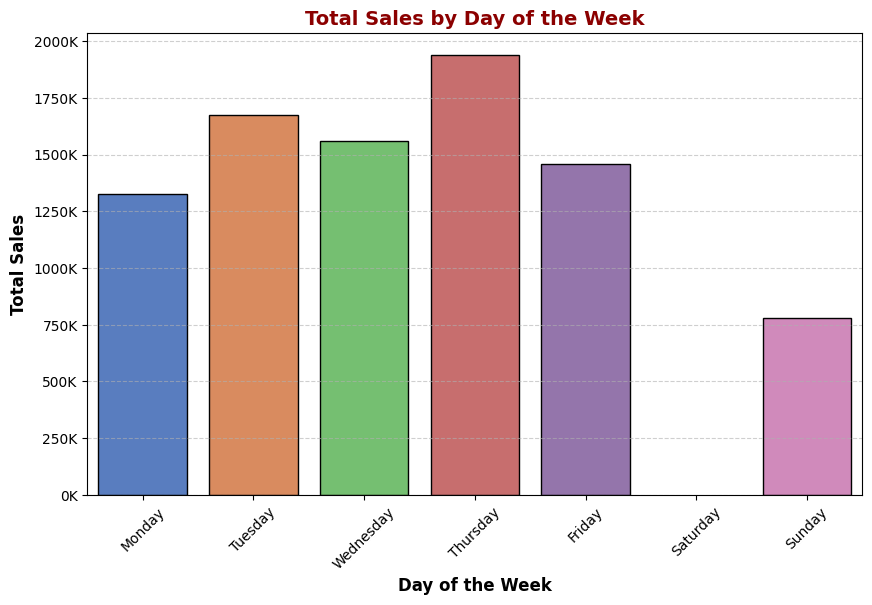

In [200]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create bar plot
sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette="muted", edgecolor="black")

# Formatting
plt.xlabel("Day of the Week", fontsize=12, fontweight="bold")
plt.ylabel("Total Sales", fontsize=12, fontweight="bold")
plt.title("Total Sales by Day of the Week", fontsize=14, fontweight="bold", color="darkred")

# Format y-axis to show sales in "K" instead of full numbers
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines for better readability
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show plot
plt.show()

## Pareto Principle

### 80% of the company's revenue comes from 20% of the total customers

In [84]:
df["StockCode"].nunique()

3659

In [85]:
df["CustomerID"].nunique()

4335

In [86]:
# Total sales per customer
sales_per_customer = df.groupby("CustomerID")["TotalSales"].sum().reset_index()
sales_per_customer = sales_per_customer.sort_values(by = "TotalSales", ascending=False).reset_index(drop=True)
sales_per_customer

,CustomerID,TotalSales
0,14646.0,279138.02
1,18102.0,259657.30
2,17450.0,194390.79
3,16446.0,168472.50
4,14911.0,136161.83
...,...,...
4330,17956.0,12.75
4331,14792.0,6.20
4332,16454.0,5.90
4333,16738.0,3.75


In [87]:
# Creating a new column "Cumulative Percentage"
sales_per_customer["CumulativePercentage"] = (sales_per_customer["TotalSales"].cumsum()*100)/sales_per_customer["TotalSales"].sum()
sales_per_customer

,CustomerID,TotalSales,CumulativePercentage
0,14646.0,279138.02,3.194812
1,18102.0,259657.30,6.166662
2,17450.0,194390.79,8.391519
3,16446.0,168472.50,10.319734
4,14911.0,136161.83,11.878144
...,...,...,...
4330,17956.0,12.75,99.999819
4331,14792.0,6.20,99.999890
4332,16454.0,5.90,99.999957
4333,16738.0,3.75,100.000000


In [88]:
# Verifying the Pareto Principle
perc = round((len(sales_per_customer[sales_per_customer["CumulativePercentage"] < 80])*100)/len(sales_per_customer))
print(f"{perc}% of customers contribute to 80% of sales.")

26% of customers contribute to 80% of sales.


### 20% of the products are responsible for 80% of the revenue

In [89]:
df["StockCode"].nunique()

3659

In [90]:
# Total sales per product
sales_per_product = df.groupby("StockCode")["TotalSales"].sum().reset_index()
sales_per_product = sales_per_product.sort_values(by="TotalSales", ascending=False).reset_index(drop=True)
sales_per_product

,StockCode,TotalSales
0,23843,168469.60
1,22423,142264.75
2,85123A,100547.45
3,85099B,85040.54
4,23166,81416.73
...,...,...
3654,84201C,0.95
3655,90104,0.85
3656,90084,0.85
3657,21268,0.84


In [91]:
# Creating a new column "CumulativePercentage"
sales_per_product["CumulativePercentage"] = (sales_per_product["TotalSales"].cumsum()*100)/sales_per_product["TotalSales"].sum()
sales_per_product

,StockCode,TotalSales,CumulativePercentage
0,23843,168469.60,1.928181
1,22423,142264.75,3.556441
2,85123A,100547.45,4.707235
3,85099B,85040.54,5.680547
4,23166,81416.73,6.612384
...,...,...,...
3654,84201C,0.95,99.999966
3655,90104,0.85,99.999976
3656,90084,0.85,99.999986
3657,21268,0.84,99.999995


In [92]:
# Verifying the Pareto Principle
perc = round((len(sales_per_product[sales_per_product["CumulativePercentage"] < 80])*100)/len(sales_per_product))
print(f"{perc}% of products contribute to 80% of sales.")

21% of products contribute to 80% of sales.


### 20% of the products contribute to 80% of the sales volume

In [93]:
# Sales volume per product
volume_per_product = df.groupby("StockCode")["Quantity"].sum().reset_index()
volume_per_product = volume_per_product.sort_values(by="Quantity", ascending=False).reset_index(drop=True)
volume_per_product

,StockCode,Quantity
0,23843,80995
1,23166,77916
2,84077,54319
3,22197,49160
4,85099B,46078
...,...,...
3654,84569C,1
3655,90025F,1
3656,90130A,1
3657,21414,1


In [94]:
# Creating a new column "CumulativePercentage"
volume_per_product["CumulativePercentage"] = (volume_per_product["Quantity"].cumsum()*100)/volume_per_product["Quantity"].sum()
volume_per_product

,StockCode,Quantity,CumulativePercentage
0,23843,80995,1.570992
1,23166,77916,3.082262
2,84077,54319,4.135842
3,22197,49160,5.089357
4,85099B,46078,5.983093
...,...,...,...
3654,84569C,1,99.999922
3655,90025F,1,99.999942
3656,90130A,1,99.999961
3657,21414,1,99.999981


In [ ]:
# Verifying the Pareto Principle (80/20)
perc = round((len(volume_per_product[volume_per_product["CumulativePercentage"] < 80])*100)/len(volume_per_product))
print(f"{perc}% of products contribute to 80% of sales volume.")

23% of products contribute to 80% of sales volume.


## Create RFM Table

In [96]:
# Latest date in the dataset (for Recency calculation)
latest_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)
print(latest_date)

2011-12-10 12:50:00


In [97]:
# Group by CustomerID and calculate RFM metrics
rfm_df = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (latest_date - x.max()).days,  # Recency
    "InvoiceNo": "nunique",  # Frequency
    "TotalSales": "sum"  # Monetary
}).reset_index()

# Rename columns
rfm_df.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]

# Display the top rows
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1437.24
3,12349.0,19,1,1457.55
4,12350.0,310,1,294.40


In [98]:
rfm_df.describe()

,CustomerID,Recency,Frequency,Monetary
count,4335.000000,4335.000000,4335.000000,4335.000000
mean,15298.780392,92.684890,4.245675,2015.508106
std,1722.075082,100.172622,7.636337,8902.699230
min,12346.000000,1.000000,1.000000,0.000000
25%,13811.500000,18.000000,1.000000,304.105000
50%,15297.000000,51.000000,2.000000,661.520000
75%,16778.500000,143.000000,5.000000,1631.475000
max,18287.000000,374.000000,206.000000,279138.020000


## Adding RFM Scores

In [111]:
# Rank-based Frequency scoring
rfm_df["F_Rank"] = rfm_df["Frequency"].rank(method="first")
print(rfm_df)

# Get bin edges for Recency, Frequency (ranked), and Monetary
_, recency_bins = pd.qcut(rfm_df["Recency"], q=5, labels=[5, 4, 3, 2, 1], retbins=True)
_, frequency_bins = pd.qcut(rfm_df["F_Rank"], q=5, labels=[1, 2, 3, 4, 5], retbins=True)
_, monetary_bins = pd.qcut(rfm_df["Monetary"], q=5, labels=[1, 2, 3, 4, 5], retbins=True)

# Convert frequency rank bins to actual frequency values
actual_freq_bins = []
for i in range(len(frequency_bins) - 1):
    lower_rank = frequency_bins[i]
    upper_rank = frequency_bins[i + 1]
    actual_lower = rfm_df.loc[rfm_df["F_Rank"] >= lower_rank, "Frequency"].min()
    actual_upper = rfm_df.loc[rfm_df["F_Rank"] <= upper_rank, "Frequency"].max()
    actual_freq_bins.append(f"{actual_lower} - {actual_upper}")
    print(lower_rank)
    print(upper_rank)
    print(actual_lower)
    print(actual_upper)
    print(actual_freq_bins)

# Create a DataFrame with readable bin ranges
rfm_bin_ranges1 = pd.DataFrame({
    "Score": [1,2,3,4,5],
    "Frequency Range (Mapped)": actual_freq_bins,
    "Monetary Range": [f"{int(monetary_bins[i])} - {int(monetary_bins[i+1])}" for i in range(len(monetary_bins)-1)]
})
rfm_bin_ranges2 = pd.DataFrame({
    "Score": [5,4,3,2,1],
    "Recency Range": [f"{int(recency_bins[i])} - {int(recency_bins[i+1])}" for i in range(len(recency_bins)-1)]
})

# Display bin ranges
print(rfm_bin_ranges1)
print(rfm_bin_ranges2)

      CustomerID  Recency  Frequency  Monetary  F_Rank  R_Score  F_Score  \
0        12346.0      326          1  77183.60     1.0        1        1   
1        12347.0        2          7   4310.00  3644.0        5        5   
2        12348.0       75          4   1437.24  2840.0        2        4   
3        12349.0       19          1   1457.55     2.0        4        1   
4        12350.0      310          1    294.40     3.0        1        1   
...          ...      ...        ...       ...     ...      ...      ...   
4330     18280.0      278          1    180.60  1505.0        1        2   
4331     18281.0      181          1     80.82  1506.0        1        2   
4332     18282.0        8          2    178.05  2337.0        5        3   
4333     18283.0        4         16   2039.58  4184.0        5        5   
4334     18287.0       43          3   1837.28  2839.0        3        4   

      M_Score     Segment  
0           5     Dormant  
1           5  High Value  
2  

In [112]:
# Recency Score (lower is better, so reverse the labels)
rfm_df["R_Score"] = pd.qcut(rfm_df["Recency"], q=5, labels=[5, 4, 3, 2, 1])

# Frequency Score (higher is better)
rfm_df["F_Score"] = pd.qcut(rfm_df["Frequency"].rank(method="first"), q=5, labels=[1, 2, 3, 4, 5])

# Monetary Score (higher is better)
rfm_df["M_Score"] = pd.qcut(rfm_df["Monetary"], q=5, labels=[1, 2, 3, 4, 5])

rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,F_Rank,R_Score,F_Score,M_Score,Segment
0,12346.0,326,1,77183.60,1.0,1,1,5,Dormant
1,12347.0,2,7,4310.00,3644.0,5,5,5,High Value
2,12348.0,75,4,1437.24,2840.0,2,4,4,At-Risk
3,12349.0,19,1,1457.55,2.0,4,1,4,At-Risk
4,12350.0,310,1,294.40,3.0,1,1,2,Dormant


In [113]:
rfm_df["R_Score"] = rfm_df["R_Score"].astype(int)
rfm_df["F_Score"] = rfm_df["F_Score"].astype(int)
rfm_df["M_Score"] = rfm_df["M_Score"].astype(int)

In [114]:
def rfm_segment(row):
    if row["R_Score"] == 5 and row["F_Score"] == 5: 
        return "High Value"   
    if row["R_Score"] >= 4 and row["F_Score"] >= 4: 
        return "Loyal"
    elif row["R_Score"] >= 2 or row["F_Score"] >= 2: 
        return "At-Risk"
    else:
        return "Dormant"

rfm_df["Segment"] = rfm_df.apply(rfm_segment, axis=1)

In [115]:
rfm_df["Segment"].value_counts()

At-Risk       2837
Loyal          693
High Value     443
Dormant        362
Name: Segment, dtype: int64

F_Score         1         2         3         4         5
R_Score                                                  
1        1.729282  1.745928  2.550725  3.106383  4.000000
2        1.989950  2.135678  2.903084  3.631902  4.340000
3        1.933333  2.098901  2.888298  3.721154  4.641026
4        1.618557  2.123967  2.824859  3.738956  4.680328
5        1.659091  2.431034  2.781022  3.755000  4.762980


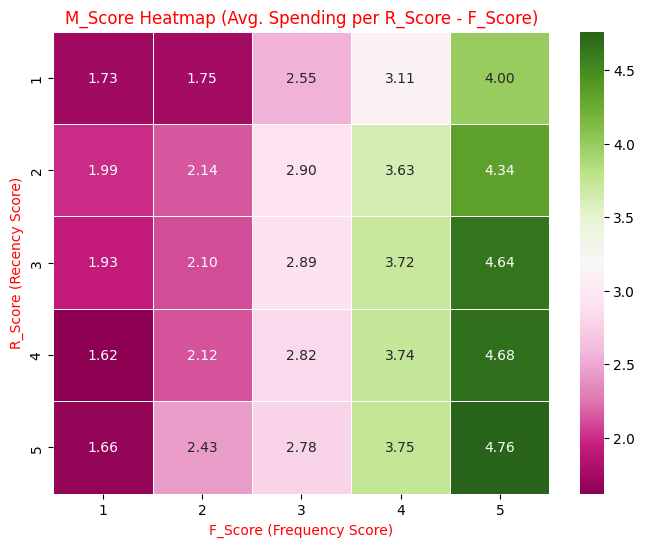

In [204]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming rfm_df is already loaded
rfm_pivot = rfm_df.pivot_table(index='R_Score', columns='F_Score', values='M_Score', aggfunc='mean', fill_value=0)
print(rfm_pivot)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(rfm_pivot, cmap="PiYG", annot=True, fmt=".2f", linewidths=0.5)

# Labels and title
plt.title("M_Score Heatmap (Avg. Spending per R_Score - F_Score)", color = 'red')
plt.xlabel("F_Score (Frequency Score)", color='red')
plt.ylabel("R_Score (Recency Score)", color='red')

# Save with transparency & high resolution
plt.savefig("Heatmap.png", dpi=300, bbox_inches="tight")

plt.show()



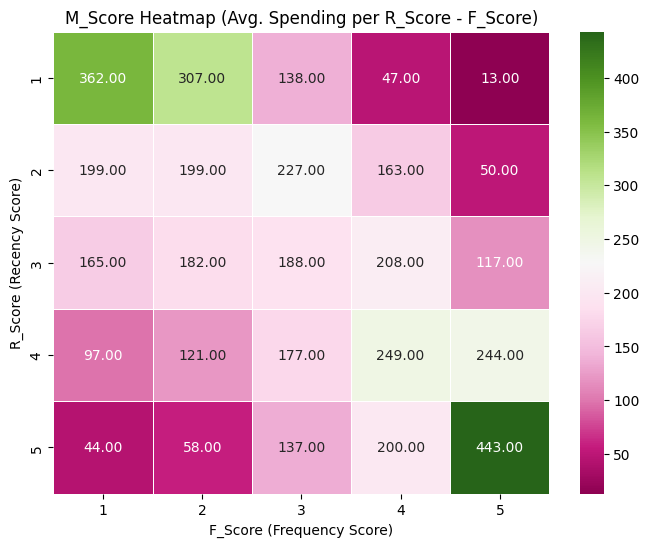

In [205]:
# Assuming rfm_df is already loaded
rfm_pivot = rfm_df.pivot_table(index='R_Score', columns='F_Score', values='M_Score', aggfunc='count', fill_value=0)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(rfm_pivot, cmap="PiYG", annot=True, fmt=".2f", linewidths=0.5)

# Labels and title
plt.title("M_Score Heatmap (Avg. Spending per R_Score - F_Score)")
plt.xlabel("F_Score (Frequency Score)")
plt.ylabel("R_Score (Recency Score)")
plt.show()

In [119]:
rfm_df

,CustomerID,Recency,Frequency,Monetary,F_Rank,R_Score,F_Score,M_Score,Segment
0,12346.0,326,1,77183.60,1.0,1,1,5,Dormant
1,12347.0,2,7,4310.00,3644.0,5,5,5,High Value
2,12348.0,75,4,1437.24,2840.0,2,4,4,At-Risk
3,12349.0,19,1,1457.55,2.0,4,1,4,At-Risk
4,12350.0,310,1,294.40,3.0,1,1,2,Dormant
...,...,...,...,...,...,...,...,...,...
4330,18280.0,278,1,180.60,1505.0,1,2,1,At-Risk
4331,18281.0,181,1,80.82,1506.0,1,2,1,At-Risk
4332,18282.0,8,2,178.05,2337.0,5,3,1,At-Risk
4333,18283.0,4,16,2039.58,4184.0,5,5,5,High Value


In [207]:
rfm_df.to_csv("rfm_data.csv", index=False)

In [ ]:
rfm_df.to_csv("rfm_new_data.csv", index=False)

In [ ]:
df.to_csv("df_cleaned.csv", index=False)